<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/1_The_Machine_Learning_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Machine Learning Landscape

[Machine Learning Notebooks](https://colab.research.google.com/github/ageron/handson-ml3/blob/main/index.ipynb#scrollTo=2joKggoL5tM7) by the author

## What Is Machine Learning?

*\[Machine learning is the\] field of study that gives computers the ability to learn without being explicitly programmed.*

Arthur Samuel, 1959

*A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.*

Tom Mitchell, 1997

## Life Satisfaction Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
lifesat_data = 'https://raw.githubusercontent.com/ageron/data/main/lifesat/lifesat.csv'
lifesat = pd.read_csv(lifesat_data)
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [3]:
lifesat.shape

(27, 3)

In [4]:
lifesat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 776.0+ bytes


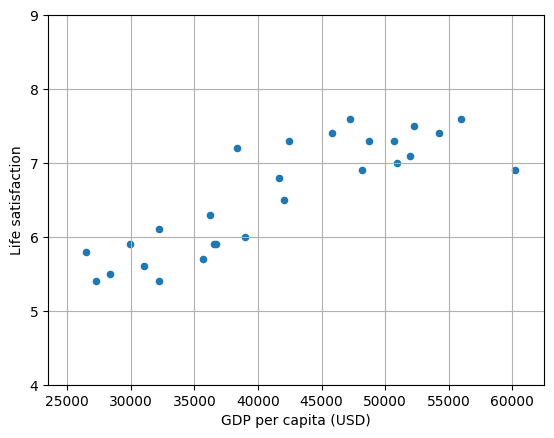

In [5]:
# visualize the data
lifesat.plot(kind='scatter',
             grid=True,
             x='GDP per capita (USD)',
             y='Life satisfaction')
plt.axis([23_500, 62_500, 4, 9]);

## Two Regression Models

$y = wx + b$

In our example, $w$ represents `GDP per capita (USD)`. In order to determine the best values for $w$ and $b$, a **cost function** is typically used.

In [6]:
from re import L
X = lifesat[['GDP per capita (USD)']]
y = lifesat['Life satisfaction']

In [7]:
lr_model = LinearRegression()
lr_model.fit(X, y)
lr_model

LinearRegression()

In [8]:
lr_model.coef_[0], lr_model.intercept_

(6.778899694341222e-05, 3.7490494273769093)

In [9]:
kn_model = KNeighborsRegressor(n_neighbors=3)
kn_model.fit(X, y)
kn_model

KNeighborsRegressor(n_neighbors=3)

In [10]:
lr_fitted = lr_model.predict(X)
kn_fitted = kn_model.predict(X)

sum(lr_fitted - kn_fitted)

0.3666666666666485

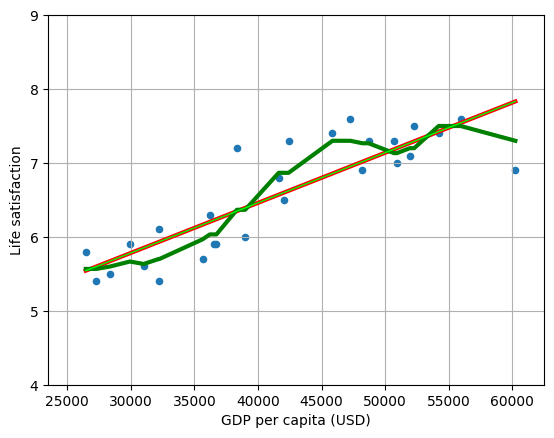

In [11]:
# visual the data and the regression line
lifesat.plot(kind='scatter',
             grid=True,
             x='GDP per capita (USD)',
             y='Life satisfaction')
# fit from LinearRegression
plt.plot(lifesat['GDP per capita (USD)'],
         lr_fitted,
         color='red',
         linewidth=3)
# fit from KNeighborsRegressor
plt.plot(lifesat['GDP per capita (USD)'],
         kn_fitted,
         color='green',
         linewidth=3)
# regression line
plt.plot(X,
         lr_model.intercept_ + lr_model.coef_[0] * X,
         color='lime',
         linewidth=1)
plt.axis([23_500, 62_500, 4, 9]);

## Make a prediction for `Cyprus`

In [12]:
lr_model.predict([[37_655.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.30165767])

In [13]:
kn_model.predict([[37_655.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([6.33333333])

## Some Terminology

- ***Feature selection***: selecting the most useful features to train on among existing features
- ***Feature extraction***: combining existing features to produce a more useful one
    - example: dimensionality reduction
- ***Hyperparameter***: a parameter of the learning algorithm (not of the model)
    - must be set prior to training and remains constant during training
- ***Overfitting***: the model performs well on the training data but does not generalize well
    - happens when the model is too complex relative to the amount of noisiness of the training data
    - possible solutions:
        - simplify the model
            - select one with fewer parameters (linear model rather than a high-degree polynomial model)
            - reduces the number of features from the training data
            - constrain the model (regularization, reduce degrees of freedom)
        - gather more training data
        - reduce the noise in the training data
            - fix data errors, remove outliers
- ***Underfitting***: occurs when the model is too simple to learn the underlying structure of the data
    - possible solutions:
        - slect a more powerful model with more parameters
        - feed better features to the learning algorithm (feature engineering)
        - reduce the constraints on the model

## Testing and Validating

- training set
- test set

## Hyperparameter Tuning

- validation set
- cross-validation